<a href="https://colab.research.google.com/github/Aman12457/Upgradation/blob/main/FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns

In [19]:
df = sns.load_dataset("titanic")

In [20]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
## checking missing values in dataset
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


It is not a good practice as it will result in huge loss of data

In [8]:
## delete the row or data points to handle missing values
df.dropna()

In [15]:
df.shape

(891, 15)

In [18]:
## can we do column wise deletion will it help
df.dropna(axis=1).shape

(891, 11)

Imputation missing values

<Axes: xlabel='age', ylabel='Count'>

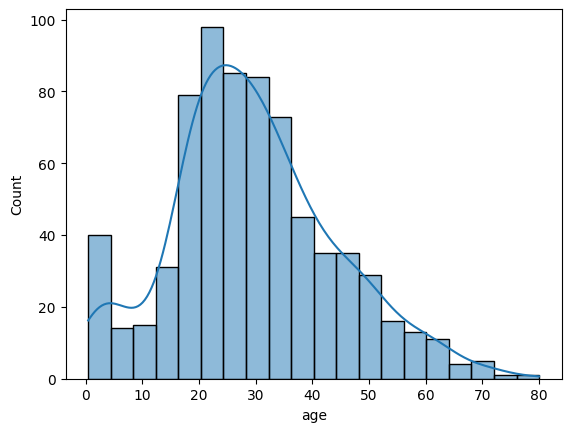

In [22]:
## mean value imputation
sns.histplot(df['age'] ,kde=True)

In [33]:
import pandas as pd

In [31]:
df['age'].dtype

dtype('O')

In [34]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age_mean'] = df['age'].fillna(df['age'].mean())


<Axes: xlabel='age_mean', ylabel='Count'>

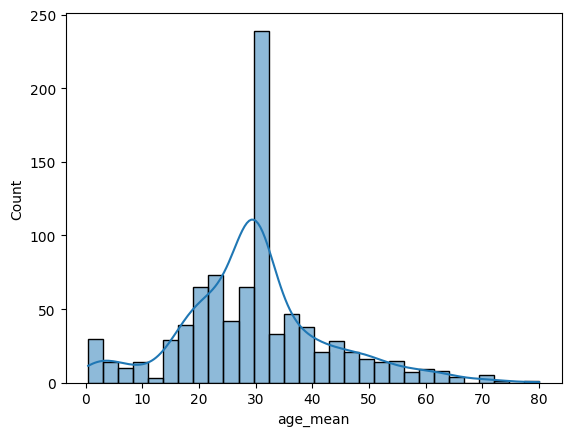

In [36]:
sns.histplot(df['age_mean'] , kde=True)

In [37]:
df[['age' , 'age_mean']]

,age,age_mean
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


In [38]:
## Medain imputation for distribution with outliers

In [39]:
## Mode imputation for categorical values

In [40]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [44]:
df['embarked_mode'] = df['embarked'].fillna(df[df['embarked'].notna()]['embarked'].mode()[0])

In [45]:
df[['embarked_mode' ,'embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [46]:
df['embarked_mode'].isnull().sum()

np.int64(0)

Handling Imbalanced dataset using SMOTE




In [1]:
from sklearn.datasets import make_classification

In [12]:
X , Y = make_classification(n_samples=1000 ,n_redundant=0, n_features =2 , n_clusters_per_class=1 , weights=[0.9] , random_state =12 )

In [15]:
import pandas as pd

In [16]:
df1 = pd.DataFrame(X , columns = ['f1' , 'f2'])
df2 = pd.DataFrame(Y , columns=['target'])

In [17]:
final_df = pd.concat([df1 , df2] , axis=1)

In [18]:
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [19]:
final_df['target'].value_counts()

,count
target,
0,900
1,100


In [20]:
import matplotlib.pyplot as plt

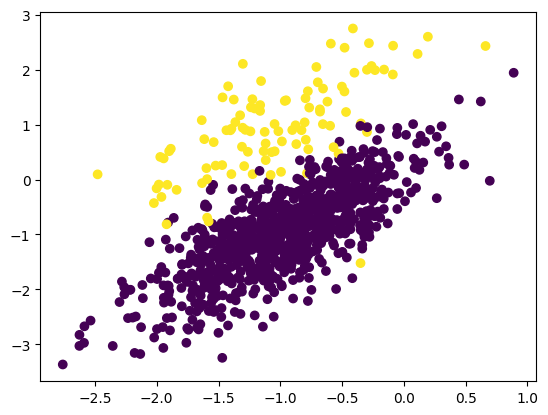

In [21]:
plt.scatter(x=final_df['f1'] , y=final_df['f2'] , c=final_df['target'])

In [23]:
!pip install imblearn

In [26]:
from imblearn.over_sampling import SMOTE

In [28]:
oversample = SMOTE()
X , Y = oversample.fit_resample(final_df[['f1' ,'f2']] , final_df['target'])

In [29]:
X.shape

(1800, 2)

In [30]:
Y[Y==0].shape

(900,)

In [31]:
len(Y[Y==1])

900

In [32]:
df1 = pd.DataFrame(X , columns = ['f1' , 'f2'])
df2 = pd.DataFrame(Y , columns=['target'])
oversample_df = pd.concat([df1 , df2] , axis=1)

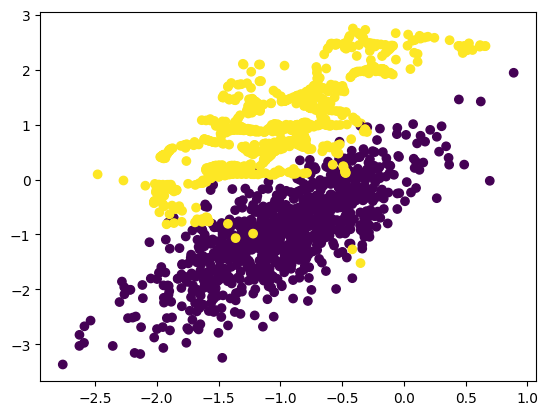

In [34]:
plt.scatter(x=oversample_df['f1'] , y=oversample_df['f2'] , c=oversample_df['target'])

Handling outliers

In [35]:
## calculating 5-number summary

In [36]:
## Minimum , Maximum , Median , Q1 , Q3 , IQR

In [37]:
import numpy as np

In [39]:
arr = np.arange(1 ,16).reshape((15,1))

In [43]:
minimum , Q1 , median , Q3 , maximum  =np.quantile(arr , [0 , 0.25 , 0.50 , 0.75 , 1.00])

In [45]:
print(minimum , Q1 , median , Q3 , maximum )

1.0 4.5 8.0 11.5 15.0


<Axes: >

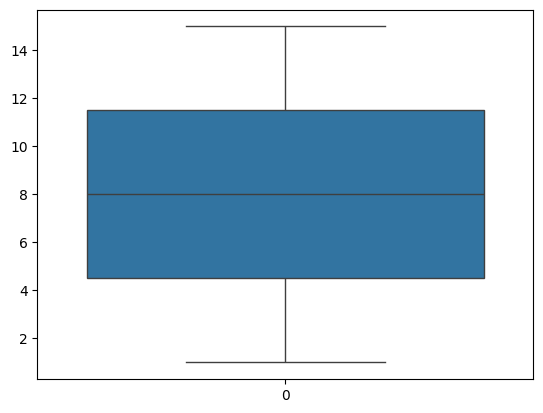

In [47]:
import seaborn as sns
sns.boxplot(arr)

In [48]:
new_arr = np.append(arr , 100)

<Axes: >

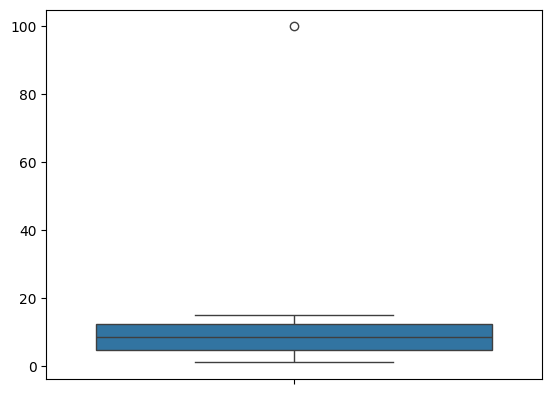

In [49]:
sns.boxplot(new_arr)

In [50]:
sns

<module 'seaborn' from '/usr/local/lib/python3.12/dist-packages/seaborn/__init__.py'>

In [52]:
df = sns.load_dataset('tips')

In [53]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [61]:
mean_time = df.groupby('time')['total_bill'].mean().to_dict()

/tmp/ipython-input-137849218.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_time = df.groupby('time')['total_bill'].mean().to_dict()


In [62]:
mean_time

{'Lunch': 17.168676470588235, 'Dinner': 20.79715909090909}

In [63]:
df['encoded_time'] = df['time'].map(mean_time)

In [64]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,encoded_time
0,16.99,1.01,Female,No,Sun,Dinner,2,20.797159
1,10.34,1.66,Male,No,Sun,Dinner,3,20.797159
2,21.01,3.50,Male,No,Sun,Dinner,3,20.797159
3,23.68,3.31,Male,No,Sun,Dinner,2,20.797159
4,24.59,3.61,Female,No,Sun,Dinner,4,20.797159


In [65]:
df[['total_bill' , 'encoded_time']]

,total_bill,encoded_time
0,16.99,20.797159
1,10.34,20.797159
2,21.01,20.797159
3,23.68,20.797159
4,24.59,20.797159
...,...,...
239,29.03,20.797159
240,27.18,20.797159
241,22.67,20.797159
242,17.82,20.797159
